This project is taken from - https://krischer.github.io/seismo_live_build/html/Reproducible%20Papers/Syngine_2016/figure_1_phase_relative_times_wrapper.html
All the credit goes to their respective owners
This is just for personal learning purpose
If I modify the code I will mention it.

In [1]:
%matplotlib inline
import obspy
from obspy.clients.syngine import Client
c = Client()

In [65]:
# Define latitude/longitude for a bunch of receivers. # we can add as many receivers as we like and mention their coordinates
bulk = [
    [0.0, 20.0],
    [0.0, 30.0],
    [0.0, 40.0],
    [0.0, 50.0],
    [0.0, 60.0],
    [0.0, 70.0],
    [0.0, 80.0],
    [0.0, 90.0]
]

# Request them all at once.
st = c.get_waveforms_bulk(
    model="ak135f_2s", bulk=bulk, sourcelatitude=0.0,
    sourcelongitude=0.0, sourcedepthinmeters=600000,
    starttime="P-50",
    endtime="S+200",
    components="Z")  
# st is now a stream containing traces for all the receivers in the bulk object.
# the synthetic seismogram generated will be outputted at 10 Hz
# get_waveforms_bulk will Request waveforms for multiple receivers simultaneously from the client c
# here in this case client is syngine, that will generate synthetic seismograms, 
# there are actually various ways of passing station coordinates in the bulk variable here - [Network code, station code] or the one given
# one given here is very cool, directly putting the latitutde and the longitude. So basically bulk is like a list.
# model parameters = so there are bunch of standard global tomographic models ak135 and iaspe something is very popular globally.
# bulk parameter = specify the receivers to download the waveforms in bulk 
# specify source latitude, longitude and depth, specify starttime and endtime

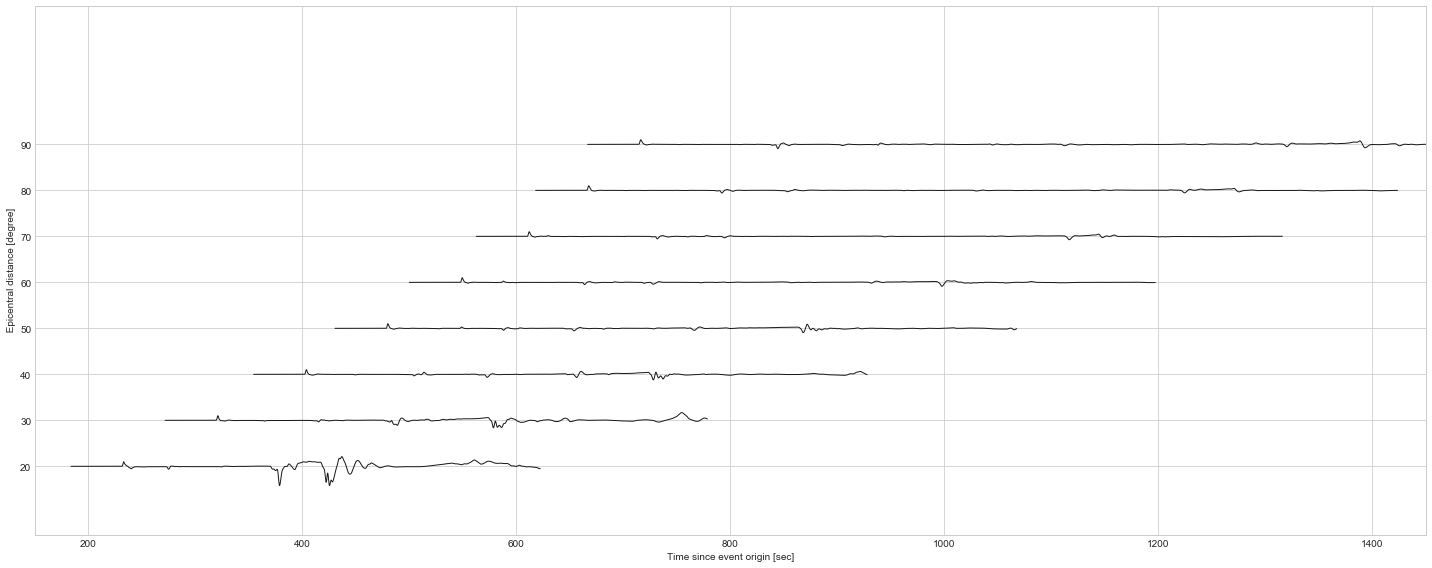

In [67]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")
# styles of plots : https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html what kind of groups of plots that we want.
st2 = st.copy()
# its safe to work on its copy so we still have original access just in case we want to do some different kind of processing on them.
for tr in st2:
    tr.data /= np.abs(tr.data[:700]).max()      # steps we do for normalization
plt.figure(figsize=(20,8))
 #whenever we want to plot figure, remember this, we can specify figure size(8,3) 8 represents length, 3 represents height.
for _i,(dist,tr) in enumerate(zip(bulk,st2)):
# now there are two iterators _i and (dist,tr) , now zip(bulk,st2) will output an zip object
#zip object will combine each element of bulk with corresponding element of st2 and made them an seprate element ().
# enumerate will take every element in a zip object and put a counter there starting from 0 and make each element an individual element
# so basically _i will iterate through the counting number whereas (dist,tr) 
     diff = tr.stats.starttime.timestamp - obspy.UTCDateTime(1900, 1, 1).timestamp
# every UTCDateTime object has a unique POSIX number,which can be obtained by applying timestamp to UTCDateTime
# so here the first term represents the origin time of seismogram, i.e the P-50s, and the origin time of an earthquake or source is assume to be 0.
# and is considered equal to 1900,1,1 here
# so this difference is now added to our tr.times () -- which starts from 0 to S+200.
     plt.plot(tr.times()+diff,tr.data+dist[1],color = "0.1", lw = 1.0)
# Ok now tr.data is amplified. and the distance is added vertically dist[1] represents the longitude of receiver in this loop 
plt.xlim(150,1450)
plt.xlabel("Time since event origin [sec]")
plt.ylabel(" Epicentral distance [degree]")
plt.yticks([_i[1] for _i in bulk])
plt.ylim(5,120)
plt.tight_layout()
plt.show()

# We can play with different values of K in  tr.data*K, to get the best picture 
# One thing that we noticed is by amplifying the tr.data we are now able to identify small intermediate  seismic phases between P 
# and S phases
# So we can study the intermediate phases using this technique


In [27]:
a = [[2,3,6],[7,90,3]]
b = [[34,57,68],[2,76,8]]

In [33]:
s = zip(a,b)

In [34]:
s

In [35]:
print(list(s))

[([2, 3, 6], [34, 57, 68]), ([7, 90, 3], [2, 76, 8])]


In [31]:
s = enumerate(a)

In [32]:
print(list(s))

[(0, [2, 3, 6]), (1, [7, 90, 3])]


In [36]:
a = [10,20,31,42,50]

In [37]:
x =enumerate(a)

In [38]:
print(list(x))

[(0, 10), (1, 20), (2, 31), (3, 42), (4, 50)]


In [39]:
st

8 Trace(s) in Stream:
XX.S0001.SE.BXZ | 1900-01-01T00:03:03.700000Z - 1900-01-01T00:08:42.400000Z | 10.0 Hz, 3388 samples
XX.S0002.SE.BXZ | 1900-01-01T00:04:31.700000Z - 1900-01-01T00:11:18.600000Z | 10.0 Hz, 4070 samples
XX.S0003.SE.BXZ | 1900-01-01T00:05:54.400000Z - 1900-01-01T00:13:47.900000Z | 10.0 Hz, 4736 samples
XX.S0004.SE.BXZ | 1900-01-01T00:07:10.500000Z - 1900-01-01T00:16:07.700000Z | 10.0 Hz, 5373 samples
XX.S0005.SE.BXZ | 1900-01-01T00:08:19.900000Z - 1900-01-01T00:18:17.300000Z | 10.0 Hz, 5975 samples
XX.S0006.SE.BXZ | 1900-01-01T00:09:22.500000Z - 1900-01-01T00:20:16.100000Z | 10.0 Hz, 6537 samples
XX.S0007.SE.BXZ | 1900-01-01T00:10:18.100000Z - 1900-01-01T00:22:03.700000Z | 10.0 Hz, 7057 samples
XX.S0008.SE.BXZ | 1900-01-01T00:11:06.600000Z - 1900-01-01T00:23:39.300000Z | 10.0 Hz, 7528 samples

In [49]:
b = st[0].stats.starttime.timestamp

In [50]:
a= obspy.UTCDateTime(1900, 1, 1).timestamp

In [51]:
obspy.UTCDateTime(1900, 1, 1)

1900-01-01T00:00:00.000000Z

In [52]:
b-a

183.69999980926514

In [53]:
l = enumerate(zip(bulk,st))

In [54]:
print(list(l))

[(0, ([0.0, 20.0], <obspy.core.trace.Trace object at 0x000001EB8D867848>)), (1, ([0.0, 30.0], <obspy.core.trace.Trace object at 0x000001EB8D867DC8>)), (2, ([0.0, 40.0], <obspy.core.trace.Trace object at 0x000001EB8D868888>)), (3, ([0.0, 50.0], <obspy.core.trace.Trace object at 0x000001EB8D868E08>)), (4, ([0.0, 60.0], <obspy.core.trace.Trace object at 0x000001EB8D865088>)), (5, ([0.0, 70.0], <obspy.core.trace.Trace object at 0x000001EB8D865348>)), (6, ([0.0, 80.0], <obspy.core.trace.Trace object at 0x000001EB8D8655C8>)), (7, ([0.0, 90.0], <obspy.core.trace.Trace object at 0x000001EB8D865848>))]


In [55]:
for _i, (dist, tr) in enumerate(zip(bulk, st)):
    print(dist[1])

20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
